# 모듈 임포팅

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

In [ ]:
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense

In [ ]:
import time

# Keras DNN 최소 코드


# 데이터 준비

1차원 데이터 x와 x**2의 1차원 데이타 y

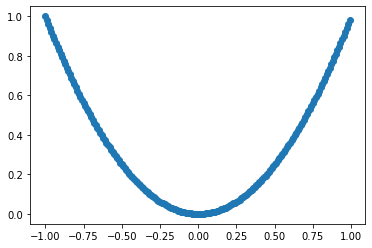

In [ ]:
import numpy as np

x = np.arange(-1,1,0.01)
y = x**2

plt.scatter(x,y)

In [ ]:
print(len(x))
print(x.shape)


200
(200,)


## 최소 코드

아래의 코드는 최소 코드.

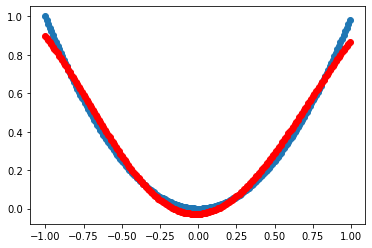

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Input

import time


# 모델 정의
model = keras.Sequential()
model.add(Input(1))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


# 컴파일 : 모델 + optimizer + loss
model.compile(optimizer="SGD", loss="mse")


# 학습
model.fit(x, y, epochs=1000, verbose=0, batch_size=20)


# 예측
y_ = model.predict(x)


# 결과 그래프로 보기
plt.scatter(x,y) # 정답
plt.scatter(x,y_,color='r') # 결과
plt.show()

# Keras DNN 최소 코드에 기본 정도만 추가

최소는 아니고, 이정도는 매번 사용하는 코드

## model.evaluate() - 성능 평가하기

7/7 [==============================] - 0s 2ms/step - loss: 0.0012 - mae: 0.0280
loss= 0.0011553338263183832
mae= 0.02798866480588913


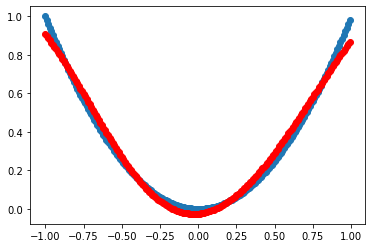

In [ ]:
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense


model = keras.Sequential()
model.add(Input(1))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh' ))
model.add(Dense(1))


#model.compile(optimizer="SGD", loss="mse")
model.compile(optimizer="SGD", loss="mse", metrics=["mae"])


model.fit(x, y, epochs=1000, verbose=0, batch_size=20)

loss, mae = model.evaluate(x, y) # ADD
print("loss=", loss) # ADD
print("mae=", mae) # ADD


y_ = model.predict(x)


plt.scatter(x,y)
plt.scatter(x,y_,color='r')
plt.show()

출력에 loss와 mae가 추가되었다.

## 테스트셋으로 평가하기

데이터를 train과 test으로 나누어 준비한다.

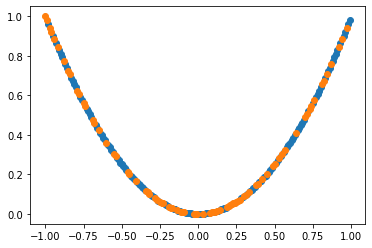

In [ ]:
x = np.arange(-1,1,0.01)
np.random.shuffle(x)
y = x**2

split_index = int(x.shape[0]*0.6)

train_x, test_x = x[:split_index], x[split_index:]
train_y, test_y = y[:split_index], y[split_index:]

plt.scatter(train_x,train_y)
plt.scatter(test_x,test_y)
plt.show()

3/3 [==============================] - 0s 4ms/step - loss: 0.0023 - mae: 0.0366
loss= 0.0022826336789876223
mae= 0.03655928745865822


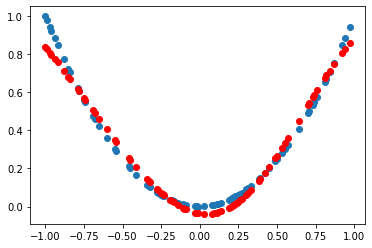

In [ ]:
model = keras.Sequential()
model.add(Input(1))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mae"])


# model.fit(x, y, epochs=1000, verbose=0, batch_size=20)
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)


# loss, mae = model.evaluate(x, y)
loss, mae = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mae=", mae)


# y_ = model.predict(x)
y_ = model.predict(test_x)

# plt.scatter(x,y)
plt.scatter(test_x,test_y)
# plt.scatter(x,y_,color='r')
plt.scatter(test_x,y_,color='r')
plt.show()

train_x, train_y로 학습하였고,
evaluate()와 predict()에는 test_x, test_y를 사용하였다.

그려진 그림을 보면 test_x의 점사이에 빈 간격이 보인다. 그 간격이 train_x에 해당한다.

## Base Model 결과 저장

이후 비교를 위해 그래프를 저장해 둔다.


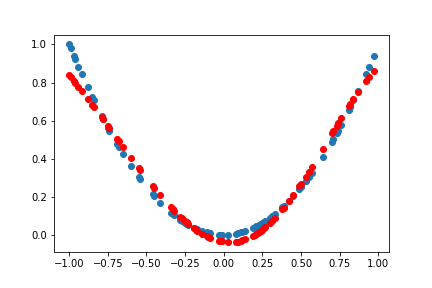

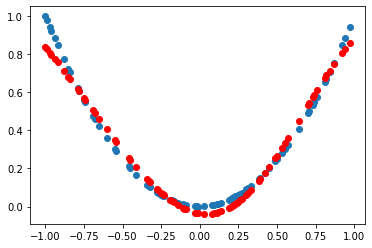

In [ ]:
plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.savefig("base_result.png")

from IPython.display import Image
display(Image("base_result.png"))

## 학습 시간을 출력

elapsed : 9.229912996292114
3/3 [==============================] - 0s 4ms/step - loss: 0.0020 - mae: 0.0340
loss= 0.001978454412892461
mae= 0.033962614834308624


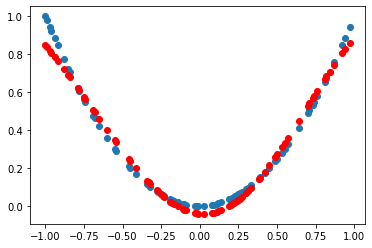

In [ ]:
model = keras.Sequential()
model.add(Input(1))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mae"])

start_time = time.time() # ADD
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time)) # ADD 
    

loss, mae = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mae=", mae)


y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

elapsed로 경과된 시간이 초 단위로 보인다.

## model.summary() 네트웤 모양 보기

Model: "sequential_66"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_198 (Dense)            (None, 10)                20        
_________________________________________________________________
dense_199 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_200 (Dense)            (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 10.473006963729858


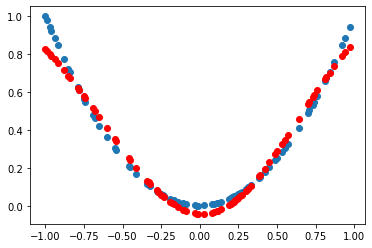

In [ ]:
model = keras.Sequential()
model.add(Input(1))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mae"])
model.summary() # ADD

start_time = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))


y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

네트웤의 모양이 보인다.

노드 10개, 10개를 갖는 은닉층 2개가 있다.


모든 레이어는 activation(w\*x+b) 의 형태로, 

첫 번 째 은닉층은 20개( = ((1+1)\*10) = (입력수+1)\*10)의 웨이트를, 

두 번 째 은닉층은 110개( = ( (10+1)\*10) )의 웨이트가 있다.. 


# Keras DNN Template

본 실습에 사용되는 코든 코드의 템플릿.


Model: "sequential_67"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_201 (Dense)            (None, 10)                20        
_________________________________________________________________
dense_202 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_203 (Dense)            (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 10.475699663162231
3/3 [==============================] - 0s 4ms/step - loss: 0.0015 - mae: 0.0307
loss= 0.0015386873856186867
mae= 0.0306546688079834


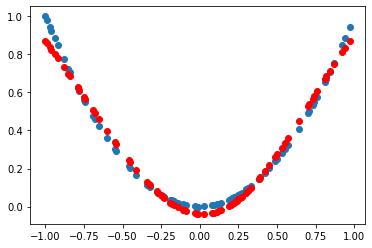

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Input

import time


# 모델 정의
model = keras.Sequential()
model.add(Input(1))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


# 모델 컴파일
model.compile(optimizer="SGD", loss="mse", metrics=["mae"])
model.summary()


# 학습
start_time = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))


# 평가
loss, mae = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mae=", mae)


# 예측
y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

# layer 수

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

import time

from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense

## 히든 레이어를 1개 만

Model: "sequential_68"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_204 (Dense)            (None, 10)                20        
_________________________________________________________________
dense_205 (Dense)            (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________
elapsed : 9.087599277496338
3/3 [==============================] - 0s 4ms/step - loss: 0.0023 - mae: 0.0369
loss= 0.0023434958420693874
mae= 0.036883048713207245


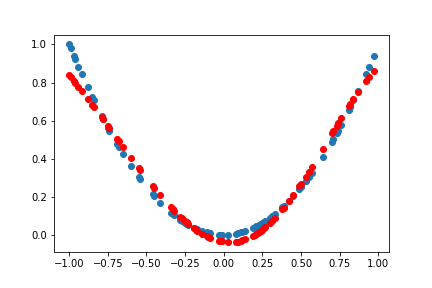

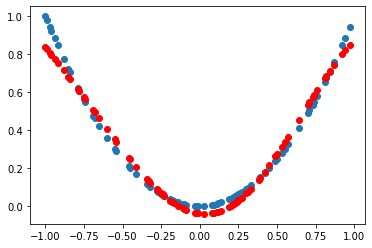

In [ ]:
model = keras.Sequential()
model.add(Input(1))
model.add(Dense(10, activation='tanh'))
# model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mae"])
model.summary()


start_time = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))    


loss, mae = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mae=", mae)


# base 모델의 결과
display(Image("base_result.png")) # ADD

y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

## 히든레이어 없을 때

Model: "sequential_69"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_206 (Dense)            (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
elapsed : 8.16237735748291
3/3 [==============================] - 0s 4ms/step - loss: 0.1009 - mae: 0.2825
loss= 0.10093362629413605
mae= 0.2824670374393463


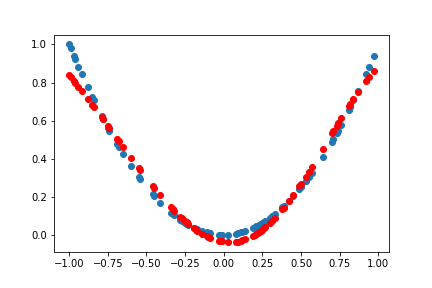

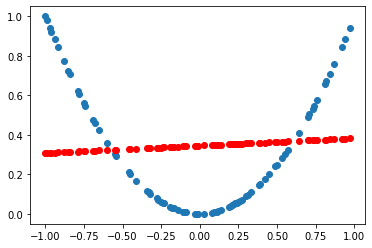

In [ ]:
from tensorflow.keras.layers import Input

model = keras.Sequential()
model.add(Input(1))
# model.add(Dense(10, activation='tanh'))
# model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mae"])
model.summary()


start_time = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))    


loss, mae = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mae=", mae)


# base 모델의 결과
display(Image("base_result.png")) # ADD

y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

히든 레이어가 없을 경우 학습되지 않는다.

## 히든 레이어를 3개로

Model: "sequential_70"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_207 (Dense)            (None, 10)                20        
_________________________________________________________________
dense_208 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_209 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_210 (Dense)            (None, 1)                 11        
Total params: 251
Trainable params: 251
Non-trainable params: 0
_________________________________________________________________
elapsed : 10.473989725112915
3/3 [==============================] - 0s 4ms/step - loss: 0.0016 - mae: 0.0319
loss= 0.001575544709339738
mae= 0.03194158524274826


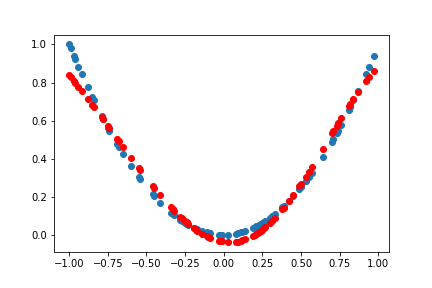

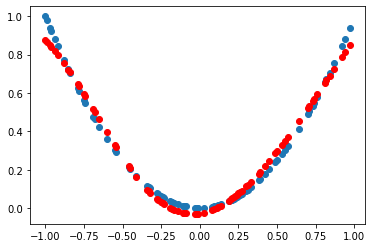

In [ ]:
model = keras.Sequential()
model.add(Input(1))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh')) # ADD
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mae"])
model.summary()


start_time = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))    


loss, mae = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mae=", mae)


display(Image("base_result.png"))

y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

3개로 증가해도 별 차이 없다.

## 히든 레이어를 5개로

Model: "sequential_71"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_211 (Dense)            (None, 10)                20        
_________________________________________________________________
dense_212 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_213 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_214 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_215 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_216 (Dense)            (None, 1)                 11        
Total params: 471
Trainable params: 471
Non-trainable params: 0
_______________________________________________________

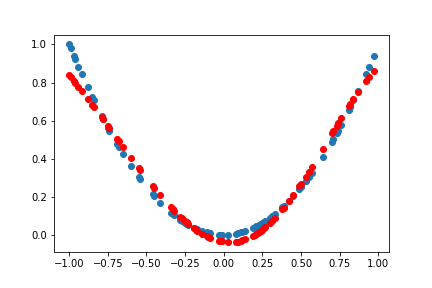

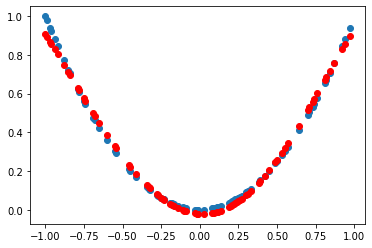

In [ ]:
model = keras.Sequential()
model.add(Input(1))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh')) # ADD
model.add(Dense(10, activation='tanh')) # ADD
model.add(Dense(10, activation='tanh')) # ADD
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mae"])
model.summary()


start_time = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))    


loss, mae = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mae=", mae)


display(Image("base_result.png"))

y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

5개로 증가했을 때 살짝 좋은 듯 하다.

## 히든 레이어를 10개로

Model: "sequential_72"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_217 (Dense)            (None, 10)                20        
_________________________________________________________________
dense_218 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_219 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_220 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_221 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_222 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_223 (Dense)            (None, 10)              

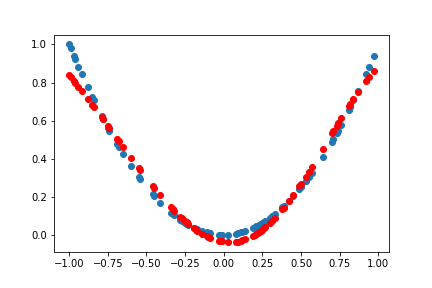

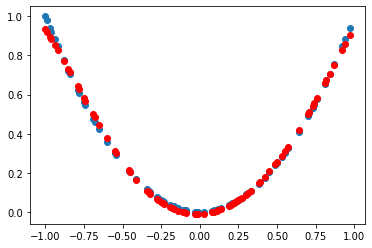

In [ ]:
model = keras.Sequential()
model.add(Input(1))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh')) # ADD
model.add(Dense(10, activation='tanh')) # ADD
model.add(Dense(10, activation='tanh')) # ADD
model.add(Dense(10, activation='tanh')) # ADD
model.add(Dense(10, activation='tanh')) # ADD
model.add(Dense(10, activation='tanh')) # ADD
model.add(Dense(10, activation='tanh')) # ADD
model.add(Dense(10, activation='tanh')) # ADD
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mae"])
model.summary()


start_time = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))    


loss, mae = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mae=", mae)


display(Image("base_result.png"))

y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

10개로 했을 때 좋아진 차이가 보인다.

# node 수

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

import time

from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense

## node 수를 작게

Model: "sequential_73"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_228 (Dense)            (None, 5)                 10        
_________________________________________________________________
dense_229 (Dense)            (None, 5)                 30        
_________________________________________________________________
dense_230 (Dense)            (None, 1)                 6         
Total params: 46
Trainable params: 46
Non-trainable params: 0
_________________________________________________________________
elapsed : 8.91972041130066
3/3 [==============================] - 0s 4ms/step - loss: 0.0016 - mae: 0.0312
loss= 0.0016125555848702788
mae= 0.03120562992990017


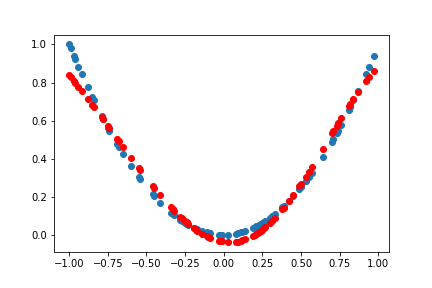

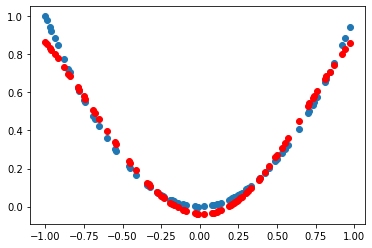

In [ ]:
model = keras.Sequential()
model.add(Input(1))
# model.add(Dense(10, activation='tanh'))
# model.add(Dense(10, activation='tanh'))
model.add(Dense(5, activation='tanh'))
model.add(Dense(5, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mae"])
model.summary()


start_time = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))    


loss, mae = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mae=", mae)


display(Image("base_result.png"))

y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

5개 노드의 경우 살짝 차이가 난다.

## 노드 수를 아주 작게

Model: "sequential_74"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_231 (Dense)            (None, 2)                 4         
_________________________________________________________________
dense_232 (Dense)            (None, 2)                 6         
_________________________________________________________________
dense_233 (Dense)            (None, 1)                 3         
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________
elapsed : 9.233150482177734
3/3 [==============================] - 0s 5ms/step - loss: 0.0091 - mae: 0.0637
loss= 0.009106216952204704
mae= 0.06366948038339615


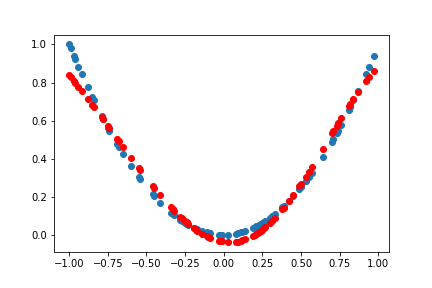

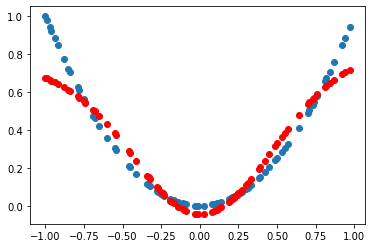

In [ ]:
model = keras.Sequential()
model.add(Input(1))
# model.add(Dense(10, activation='tanh'))
# model.add(Dense(10, activation='tanh'))
model.add(Dense(2, activation='tanh'))
model.add(Dense(2, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mae"])
model.summary()


start_time = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))    


loss, mae = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mae=", mae)


display(Image("base_result.png"))

y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

2개의 경우 차이가 커 보인다.

## 노드 수가 1개

Model: "sequential_75"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_234 (Dense)            (None, 1)                 2         
_________________________________________________________________
dense_235 (Dense)            (None, 1)                 2         
_________________________________________________________________
dense_236 (Dense)            (None, 1)                 2         
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________
elapsed : 8.850678205490112
3/3 [==============================] - 0s 4ms/step - loss: 0.0984 - mae: 0.2798
loss= 0.09840576350688934
mae= 0.279755175113678


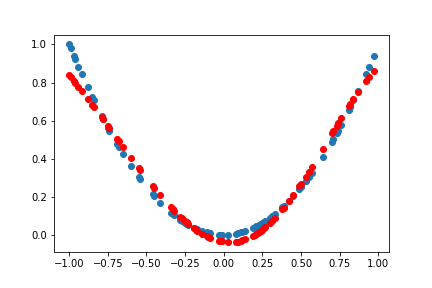

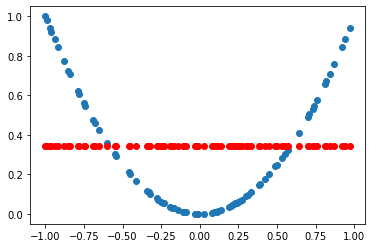

In [ ]:
model = keras.Sequential()
model.add(Input(1))
# model.add(Dense(10, activation='tanh'))
# model.add(Dense(10, activation='tanh'))
model.add(Dense(1, activation='tanh'))
model.add(Dense(1, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mae"])
model.summary()


start_time = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))    


loss, mae = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mae=", mae)


display(Image("base_result.png"))

y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

1개의 경우 거의 학습이 되지 않는다.

# sin 데이터

In [ ]:
def get_sin_data(start=0, end=10, step=0.1):
  x = np.arange(start,end,step)
  np.random.shuffle(x)
  y = np.sin(x)

  split_index = int(x.shape[0]*0.6)

  train_x, test_x = x[:split_index], x[split_index:]
  train_y, test_y = y[:split_index], y[split_index:]

  return (train_x, train_y), (test_x, test_y)

# 학습 추가 진행

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

import time

from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense

모델은 그대로 두고 데이터만 sin 데이터로 변경한다.

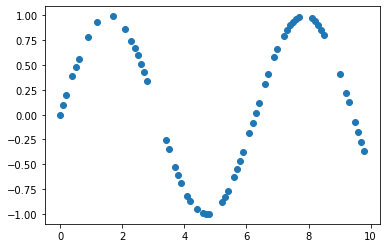

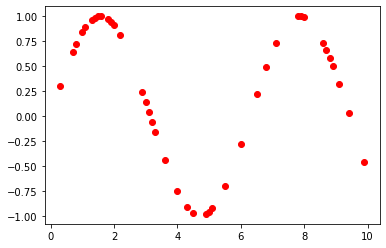

In [ ]:
(train_x, train_y), (test_x, test_y) = get_sin_data(start=0, end=10, step=0.1)

plt.scatter(train_x,train_y)
plt.show()

plt.scatter(test_x,test_y,color="r")
plt.show()

Model: "sequential_76"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_237 (Dense)            (None, 10)                20        
_________________________________________________________________
dense_238 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_239 (Dense)            (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 5.611022472381592
2/2 [==============================] - 0s 6ms/step - loss: 0.1360 - mae: 0.2731
loss= 0.1359957456588745
mae= 0.27313724160194397


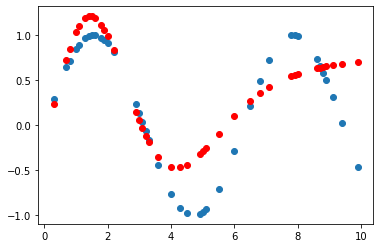

In [ ]:
model = keras.Sequential()
model.add(Input(1))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mae"])
model.summary()


start_time = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))    


loss, mae = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mae=", mae)


y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

학습이 충분히 되지 않은 듯 하다.

## 추가 학습

In [ ]:
def fit_one_more(model, train_x, train_y, test_x, test_y, batch_size=20):

  start_time = time.time()
  model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=batch_size)
  print("elapsed : {}".format(time.time() - start_time))    

  y_ = model.predict(test_x)

  plt.scatter(test_x,test_y)
  plt.scatter(test_x,y_,color='r')
  plt.show()

def fit_n_times(model, train_x, train_y, test_x, test_y, n):
  
  for i in range(n):
    print("{} times fitting".format(i))
    fit_one_more(model, train_x, train_y, test_x, test_y)


0 times fitting
elapsed : 5.567624807357788


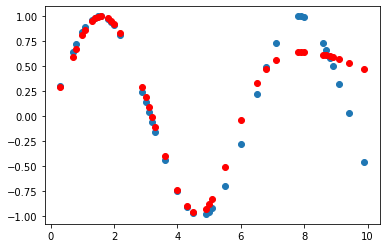

1 times fitting
elapsed : 5.231349468231201


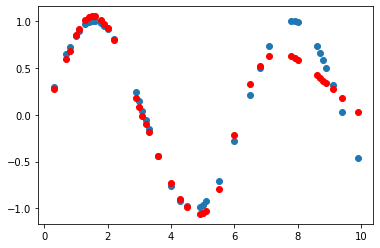

2 times fitting
elapsed : 5.6507344245910645


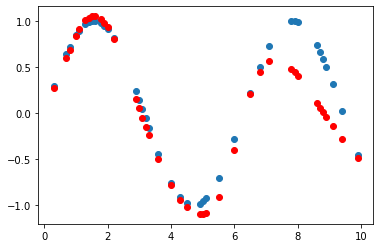

3 times fitting
elapsed : 10.257394075393677


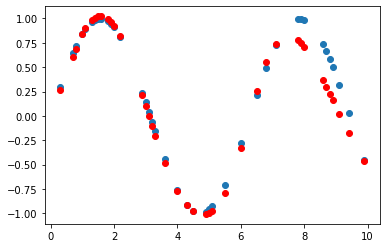

4 times fitting
elapsed : 5.319777488708496


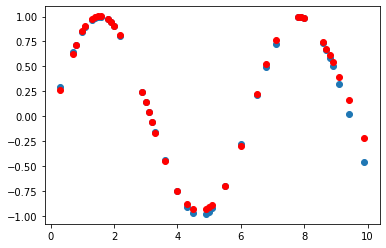

5 times fitting
elapsed : 5.412051200866699


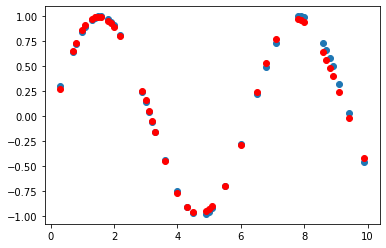

6 times fitting
elapsed : 5.437312841415405


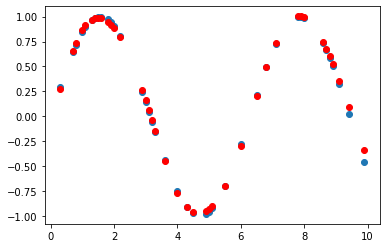

7 times fitting
elapsed : 10.258272171020508


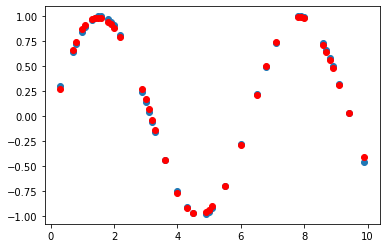

8 times fitting
elapsed : 10.268932342529297


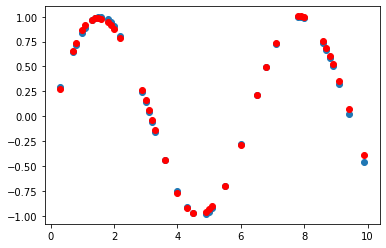

9 times fitting
elapsed : 10.476452827453613


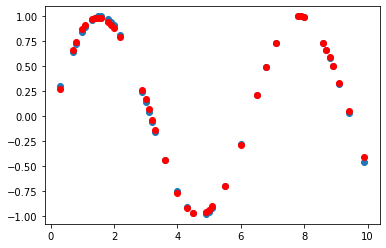

In [ ]:
fit_n_times(model, train_x, train_y, test_x, test_y, 10)

학습이 더 진행되면서 거의 완벽하게 학습된 것을 볼 수 있다.

# model.fit()의 batch_size

batch_size는 GPU와 관련된 옵션이다.

한번에 GPU에 보내는 데이터의 수이다.  

<br>

batch_size가 1일 경우 1개를 보내고, 1개의 결과를 받고, 1번 웨이트를 업데이트 한다.

batch_size가 10일 경우 10개를 보내고, 10개의 결과를 한 번에 받고, 1번 웨이트를 업데이트 한다.

<br>

GPU는 보통 수천개의 코어를 가지고 있다. 동시에 꽤 많은 연산을 처리할 수 있다. 그런데 데이터가 적으면 대부분은 사용하지 못하고 일부만 연산에 사용된다. 

복수의 데이터를 한번에 보내어 한번에 연산을 할수 있고, 그 결과를 반환할 수 있다. 이런 방법으로 연산 시간을 줄일 수 있다.

<br>

하지만, 복수의 데이터를 한번에 보내는 경우 한번에 보낸 결과가 한번에 오고 1번 업데이트 되면서 업데이트 되는 사항이 뭉개지는 단점이 있다.


In [ ]:
def build_model():

  model = keras.Sequential()
  model.add(Input(1))
  model.add(Dense(10, activation='tanh'))
  model.add(Dense(10, activation='tanh'))
  model.add(Dense(1))

  model.compile(optimizer="SGD", loss="mse", metrics=["mae"])

  return model

def fit_with_batch_sizes(train_x, train_y, test_x, test_y, batch_sizes):

  for batch_size in batch_sizes:
    model = build_model()
    print("batch_size={}".format(batch_size))
    fit_one_more(model, train_x, train_y, test_x, test_y, batch_size)

In [ ]:
(train_x, train_y), (test_x, test_y) = get_sin_data(start=0, end=10, step=0.1)

## batch_size 적용 : [1,2,5,10,20,50,100,200,500]

batch_size=1
elapsed : 82.1311719417572


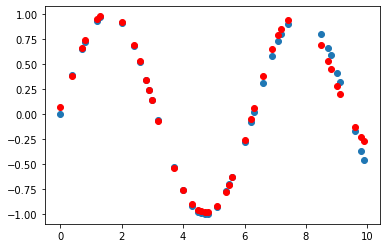

batch_size=2
elapsed : 41.172264099121094


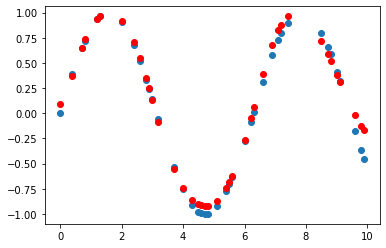

batch_size=5
elapsed : 20.713255643844604


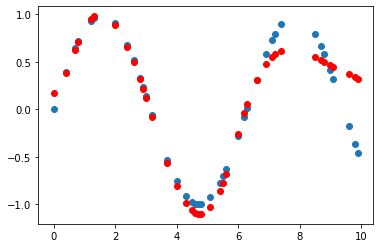

batch_size=10
elapsed : 10.463290452957153


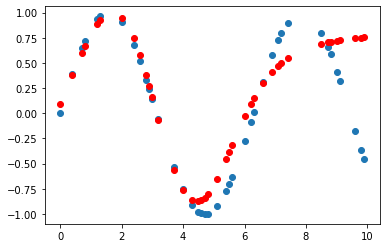

batch_size=20
elapsed : 5.7532806396484375


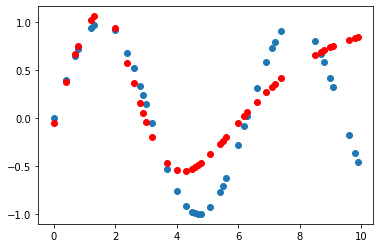

batch_size=50
elapsed : 10.486419677734375


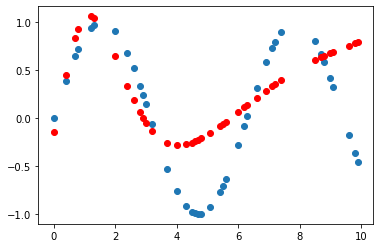

batch_size=100
elapsed : 5.371259450912476


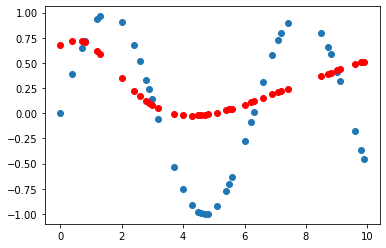

batch_size=200
elapsed : 3.7550172805786133


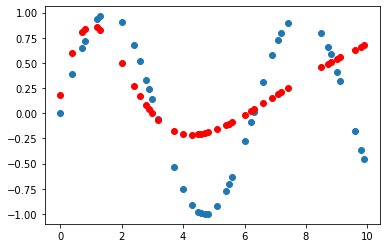

batch_size=500
elapsed : 5.386109828948975


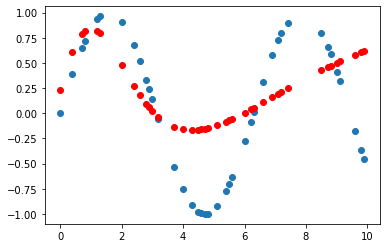

In [ ]:
fit_with_batch_sizes(train_x, train_y, test_x, test_y, batch_sizes=[1,2,5,10,20,50,100,200,500])

맨 앞의 결과가 batch_size 1인 경우이다. 100개의 데이터를 매번 1개 씩 보냈고, 매번 업데이트 했다. 

batch_size를 키우면, 시간은 줄어들지만 학습이 빠르게 진행되지 않는다.

# model.fit() verbose

- 0 : 진행하면서 아무런 출력 없이
- 1 : 진행하면서 출력과 같이


In [ ]:
# (train_x, train_y), (test_x, test_y) = get_sin_data(start=0, end=10, step=0.01)
(train_x, train_y), (test_x, test_y) = get_sin_data(start=0, end=10, step=0.0001)

model = keras.Sequential()
model.add(Input(1))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mae"])
model.summary()

print(train_x.shape)

start_time = time.time()
# model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
model.fit(train_x, train_y, epochs=5, verbose=1, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))    

Model: "sequential_86"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_267 (Dense)            (None, 10)                20        
_________________________________________________________________
dense_268 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_269 (Dense)            (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
(60000,)
Epoch 1/5
3000/3000 [==============================] - 5s 2ms/step - loss: 0.2358 - mae: 0.4013
Epoch 2/5
3000/3000 [==============================] - 5s 2ms/step - loss: 0.1163 - mae: 0.2354
Epoch 3/5
3000/3000 [==============================] - 5s 2ms/step - loss: 0.0614 - mae: 0.1485
Epoch 4/5
3000/3000 [==============================] - 5s 2ms/step - loss: 0.0184 - mae:

# loss 보기


In [ ]:
(train_x, train_y), (test_x, test_y) = get_sin_data(start=0, end=10, step=0.1)

model = keras.Sequential()
model.add(Input(1))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mae"])
model.summary()


start_time = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))    

Model: "sequential_87"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_270 (Dense)            (None, 10)                20        
_________________________________________________________________
dense_271 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_272 (Dense)            (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 5.390169143676758


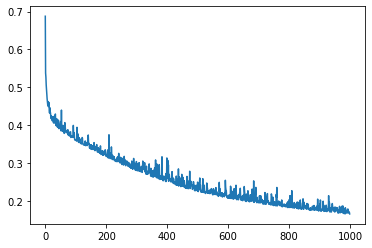

In [ ]:
plt.plot(model.history.history['loss'])
plt.show()

# 학습 시에 validation

## model.fit()의 validation_data

In [ ]:
(train_x, train_y), (test_x, test_y) = get_sin_data(start=0, end=10, step=0.1)

model = keras.Sequential()
model.add(Input(1))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mae"])
model.summary()


start_time = time.time()
# model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20, validation_data=(test_x, test_y))
print("elapsed : {}".format(time.time() - start_time))    

Model: "sequential_88"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_273 (Dense)            (None, 10)                20        
_________________________________________________________________
dense_274 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_275 (Dense)            (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 20.533409357070923


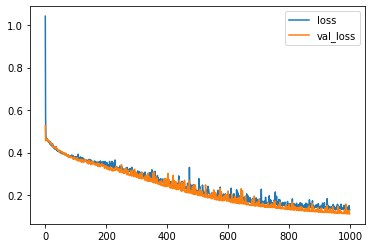

In [ ]:
plt.plot(model.history.history['loss'], label='loss')
plt.plot(model.history.history['val_loss'], label='val_loss')
plt.legend()

## model.fit()의 validation_split

따로 validation 데이터를 주지 않고, test 데이터로 준 것의 일부를 validation에 사용.

validation에 사용된 데이터는 학습에 사용되지 않는다.


In [ ]:
(train_x, train_y), (test_x, test_y) = get_sin_data(start=0, end=10, step=0.1)

model = keras.Sequential()
model.add(Input(1))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mae"])
model.summary()


start_time = time.time()
# model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20, validation_split=0.1)
print("elapsed : {}".format(time.time() - start_time))    

Model: "sequential_89"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_276 (Dense)            (None, 10)                20        
_________________________________________________________________
dense_277 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_278 (Dense)            (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 22.040660858154297


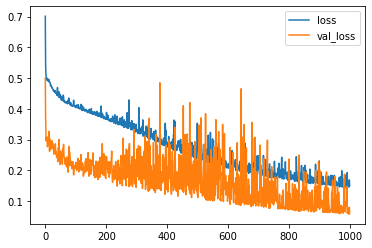

In [ ]:
plt.plot(model.history.history['loss'], label='loss')
plt.plot(model.history.history['val_loss'], label='val_loss')
plt.legend()

# 데이터 크기와 epoch 수

In [ ]:
# (train_x, train_y), (test_x, test_y) = get_sin_data(start=0, end=10, step=0.01)
(train_x, train_y), (test_x, test_y) = get_sin_data(start=0, end=10, step=0.0001)

model = keras.Sequential()
model.add(Input(1))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mae"])
model.summary()

start_time = time.time()
# model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
model.fit(train_x, train_y, epochs=5, verbose=2, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))    

Model: "sequential_90"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_279 (Dense)            (None, 10)                20        
_________________________________________________________________
dense_280 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_281 (Dense)            (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
3000/3000 - 4s - loss: 0.2941 - mae: 0.4571
Epoch 2/5
3000/3000 - 3s - loss: 0.1473 - mae: 0.2889
Epoch 3/5
3000/3000 - 3s - loss: 0.0984 - mae: 0.2095
Epoch 4/5
3000/3000 - 3s - loss: 0.0784 - mae: 0.1875
Epoch 5/5
3000/3000 - 4s - loss: 0.0583 - mae: 0.1565
elapsed : 17.285167932510376


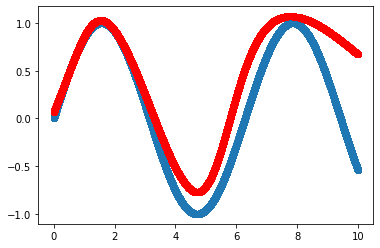

In [ ]:
y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()


train_x의 데이터 수가 6000개. epoch는 5. 총 30,000번 업데이트 되었다.


epoch가 적어도 데이터 수가 많으면 학습 잘된다.

# Shuffle


## 전체 데이터 준비 시에

60


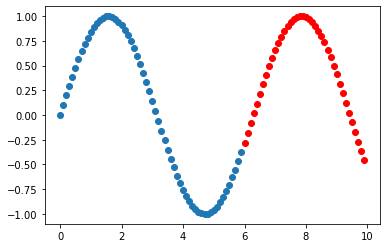

In [ ]:
x = np.arange(0,10,0.1)
# np.random.shuffle(x) # COMMENTED
y = np.sin(x)

split_index = int(x.shape[0]*0.6)
print(split_index)

train_x, test_x = x[:split_index], x[split_index:]
train_y, test_y = y[:split_index], y[split_index:]

plt.scatter(train_x, train_y)
plt.scatter(test_x, test_y, color="r")

Model: "sequential_91"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_282 (Dense)            (None, 10)                20        
_________________________________________________________________
dense_283 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_284 (Dense)            (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________


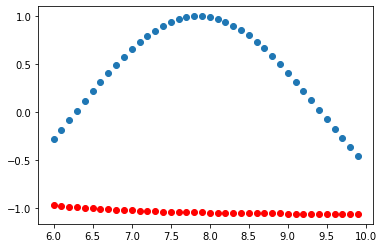

In [ ]:
model = keras.Sequential()
model.add(Input(1))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mae"])
model.summary()

model.fit(train_x, train_y, epochs=2000, verbose=0, batch_size=20)

y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

train 데이터와 test 데이터가 서로 떨어져 있다. 

train 영역의 데이터로 학습된 모델은 test 영역의 데이터에 적용하지 못한다.

전체데이터를 잘 섞어 주고, 이를 train, test로 나누어야 한다.

60


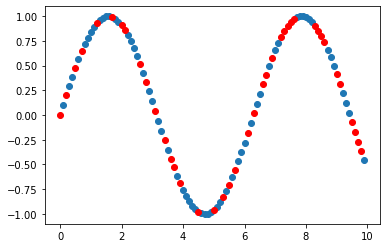

In [ ]:
x = np.arange(0,10,0.1)
np.random.shuffle(x) # UNCOMMENT
y = np.sin(x)

split_index = int(x.shape[0]*0.6)
print(split_index)

train_x, test_x = x[:split_index], x[split_index:]
train_y, test_y = y[:split_index], y[split_index:]

plt.scatter(train_x, train_y)
plt.scatter(test_x, test_y, color="r")

Model: "sequential_92"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_285 (Dense)            (None, 10)                20        
_________________________________________________________________
dense_286 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_287 (Dense)            (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________


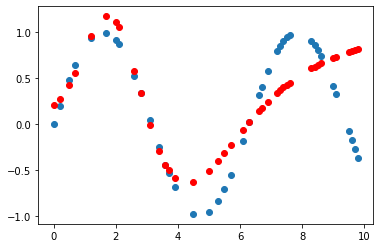

In [ ]:
model = keras.Sequential()
model.add(Input(1))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mae"])
model.summary()

model.fit(train_x, train_y, epochs=2000, verbose=0, batch_size=20)

y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

## 데이터 쌍 유지하면서 섞기

In [ ]:
x = np.arange(0,10,0.1)
y = x

indexes = np.arange(len(x))
print(indexes)
np.random.shuffle(indexes)
print(indexes)

print(x[:10])
print(y[:10])

x = x[indexes]
y = y[indexes]

print(x[:10])
print(y[:10])


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]
[ 8 33 81 99 96 63 51 20 71 48 31 27 94 16 74 52 30 70 84 82 55 56 26 92
 83 40 36 37 77 49 66 35  7  1  0 22 18 75 65 53 86 11 34 44 10 54 59 88
 39 85 12 42 97 45  9  5 80  2 93 95 24  6 62 87 47 43 72 28 23 14 60 17
 61 68 76 58 32 90 19  4 50 78 25 41 79 29 89 67 38 91 57 69  3 13 46 15
 98 21 64 73]
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
[0.8 3.3 8.1 9.9 9.6 6.3 5.1 2.  7.1 4.8]
[0.8 3.3 8.1 9.9 9.6 6.3 5.1 2.  7.1 4.8]


## 학습 진행 시에

학습 시에 데이터를 섞어 주지 않으면 특정 데이터 순서로 학습이 일어나 편향이 생길 수있다.

In [ ]:
(train_x, train_y), (test_x, test_y) = get_sin_data(start=0, end=10, step=0.01)

Model: "sequential_93"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_288 (Dense)            (None, 10)                20        
_________________________________________________________________
dense_289 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_290 (Dense)            (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 2.777174949645996


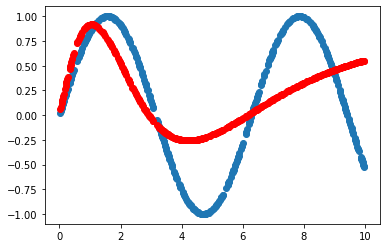

In [ ]:
model = keras.Sequential()
model.add(Input(1))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mae"])
model.summary()

start_time = time.time()
model.fit(train_x, train_y, epochs=50, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time)) 

y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

Model: "sequential_94"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_291 (Dense)            (None, 10)                20        
_________________________________________________________________
dense_292 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_293 (Dense)            (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 2.098170518875122


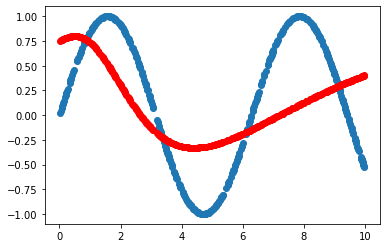

In [ ]:
model = keras.Sequential()
model.add(Input(1))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mae"])
model.summary()

start_time = time.time()
# model.fit(train_x, train_y, epochs=50, verbose=0, batch_size=20)
model.fit(train_x, train_y, epochs=50, verbose=0, batch_size=20, shuffle=True)
print("elapsed : {}".format(time.time() - start_time)) 

y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

각 epoch마다 섞어 주는 거싱 중요하다.

shuffle 파라매터의 디펄트 값은 True로, Keras의 model.fit() 호출시에는 따로 설정하지 않아도 된다.

# 모델 저장과 로딩

Model: "sequential_95"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_294 (Dense)            (None, 10)                20        
_________________________________________________________________
dense_295 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_296 (Dense)            (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 5.341551780700684
2/2 [==============================] - 0s 6ms/step - loss: 0.1964 - mae: 0.3252
loss= 0.19642427563667297
mae= 0.32520121335983276


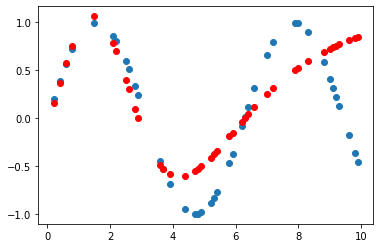

In [ ]:
(train_x, train_y), (test_x, test_y) = get_sin_data(start=0, end=10, step=0.1)

model = keras.Sequential()
model.add(Input(1))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mae"])
model.summary()


start_time = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))    


loss, mae = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mae=", mae)


y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

## 모델 저장

In [ ]:
model.save('my_model.h5')

!ls -al

total 48
drwxr-xr-x 1 root root  4096 Sep 24 16:30 .
drwxr-xr-x 1 root root  4096 Sep 24 16:18 ..
-rw-r--r-- 1 root root 12287 Sep 24 16:48 base_result.png
drwxr-xr-x 4 root root  4096 Sep 16 13:39 .config
-rw-r--r-- 1 root root 19808 Sep 24 16:57 my_model.h5
drwxr-xr-x 1 root root  4096 Sep 16 13:40 sample_data


모델 로딩

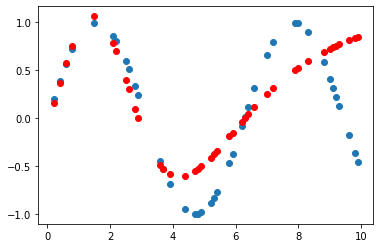

In [ ]:
new_model = keras.models.load_model('my_model.h5')

y_ = new_model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

# GPU 사용

따로 명시하지 않아도 default로 GPU를 사용한다.

명시적으로 설정할 수도 있다.

## 리스트 보기

In [ ]:
from tensorflow.python.client import device_lib
print(tf.test.gpu_device_name())

/device:GPU:0


## NVIDIA GPU 상태 보기

In [ ]:
!nvidia-smi

Fri Sep 24 16:57:30 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.63.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P0    27W /  70W |    386MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## GPU 설정

다음의 디바이스 이름이 가능

- /device:GPU:0
- /GPU:0
- /gpu:0
- /gpu
- /cpu:0
- /cpu

In [ ]:
(train_x, train_y), (test_x, test_y) = get_sin_data(start=0, end=10, step=0.01)

Model: "sequential_96"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_297 (Dense)            (None, 10)                20        
_________________________________________________________________
dense_298 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_299 (Dense)            (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 2.2445454597473145


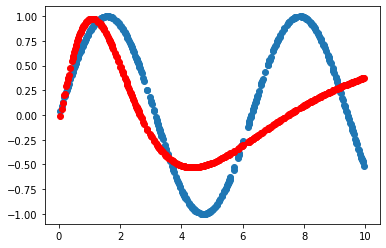

In [ ]:
with tf.device('/device:GPU:0'): # ADDED

  model = keras.Sequential()
  model.add(Input(1))
  model.add(Dense(10, activation='tanh'))
  model.add(Dense(10, activation='tanh'))
  model.add(Dense(1))


  model.compile(optimizer="SGD", loss="mse", metrics=["mae"])
  model.summary()

  start_time = time.time()
  model.fit(train_x, train_y, epochs=50, verbose=0, batch_size=20)
  print("elapsed : {}".format(time.time() - start_time)) 

  y_ = model.predict(test_x)

  plt.scatter(test_x,test_y)
  plt.scatter(test_x,y_,color='r')
  plt.show()

Model: "sequential_97"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_300 (Dense)            (None, 10)                20        
_________________________________________________________________
dense_301 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_302 (Dense)            (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 1.5009725093841553


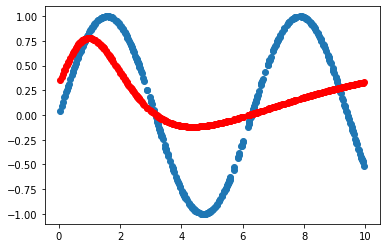

In [ ]:
# with tf.device('/GPU:0'):
with tf.device('/CPU:0'):

  model = keras.Sequential()
  model.add(Input(1))
  model.add(Dense(10, activation='tanh'))
  model.add(Dense(10, activation='tanh'))
  model.add(Dense(1))


  model.compile(optimizer="SGD", loss="mse", metrics=["mae"])
  model.summary()

  start_time = time.time()
  model.fit(train_x, train_y, epochs=50, verbose=0, batch_size=20)
  print("elapsed : {}".format(time.time() - start_time)) 

  y_ = model.predict(test_x)

  plt.scatter(test_x,test_y)
  plt.scatter(test_x,y_,color='r')
  plt.show()

# 웨이트 초기값

Dense() 생성시에 kernel_initializer, bias_initializer로 설정한다.

- 'he_normal'
- 'lecun_normal'

Model: "sequential_98"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_303 (Dense)            (None, 10)                20        
_________________________________________________________________
dense_304 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_305 (Dense)            (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 10.469915390014648
2/2 [==============================] - 0s 6ms/step - loss: 0.2202 - mae: 0.3874
loss= 0.22018274664878845
mae= 0.38744792342185974


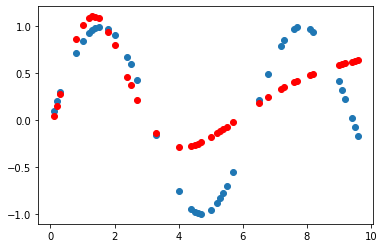

In [ ]:
(train_x, train_y), (test_x, test_y) = get_sin_data(start=0, end=10, step=0.1)

model = keras.Sequential()

model.add(Input(1))
# model.add(Dense(10, activation='tanh'))
# model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh', kernel_initializer='he_normal'))
model.add(Dense(10, activation='tanh', kernel_initializer='he_normal'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mae"])
model.summary()


start_time = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))    


loss, mae = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mae=", mae)


y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

# 노이즈

In [ ]:
def train_sin_with_noise(noise_size):

  # x = np.arange(0,10,0.1)
  x = np.arange(0,10,0.001)
  np.random.shuffle(x)
  y = np.sin(x)

  noiseless_y = np.copy(y) # ADD
  y = y + np.random.rand(y.shape[0])*noise_size - noise_size/2.0 # ADD

  split_index = int(x.shape[0]*0.6)

  train_x, test_x = x[:split_index], x[split_index:]
  train_y, test_y = y[:split_index], y[split_index:]
  test_noiseless_y = noiseless_y[split_index:] # ADD

  model = keras.Sequential()
  model.add(Input(1))
  model.add(Dense(10, activation='tanh'))
  model.add(Dense(10, activation='tanh'))
  model.add(Dense(1))


  model.compile(optimizer="SGD", loss="mse", metrics=["mae"])
  model.summary()


  start_time = time.time()
  model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=100)
  print("elapsed : {}".format(time.time() - start_time))    


  loss, mae = model.evaluate(test_x, test_y)
  print("loss=", loss)
  print("mae=", mae)


  y_ = model.predict(test_x)

  # plt.scatter(test_x,test_y)
  plt.scatter(test_x,test_y, s=1)
  plt.scatter(test_x,y_, s=1)
  plt.show()

## 노이즈 없을 때

Model: "sequential_99"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_306 (Dense)            (None, 10)                20        
_________________________________________________________________
dense_307 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_308 (Dense)            (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 82.14898610115051
125/125 [==============================] - 0s 1ms/step - loss: 3.0577e-04 - mae: 0.0154
loss= 0.00030576958670280874
mae= 0.015385076403617859


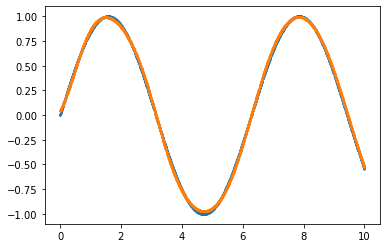

In [ ]:
train_sin_with_noise(0.0)

## 노이즈 크기 0.1

Model: "sequential_100"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_309 (Dense)            (None, 10)                20        
_________________________________________________________________
dense_310 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_311 (Dense)            (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 82.14807224273682
125/125 [==============================] - 0s 1ms/step - loss: 0.0013 - mae: 0.0296
loss= 0.0012949993833899498
mae= 0.029605142772197723


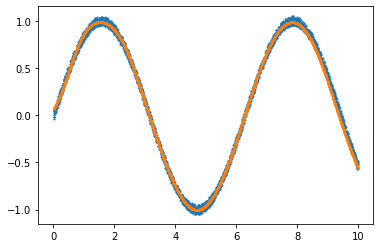

In [ ]:
train_sin_with_noise(0.1)

## 노이즈 크기 0.5

Model: "sequential_101"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_312 (Dense)            (None, 10)                20        
_________________________________________________________________
dense_313 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_314 (Dense)            (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 71.14433670043945
125/125 [==============================] - 0s 2ms/step - loss: 0.0237 - mae: 0.1314
loss= 0.023728907108306885
mae= 0.13140414655208588


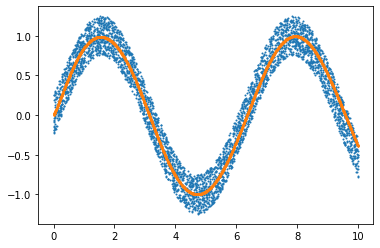

In [ ]:
train_sin_with_noise(0.5)

## 노이즈 크기 1.0

Model: "sequential_102"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_315 (Dense)            (None, 10)                20        
_________________________________________________________________
dense_316 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_317 (Dense)            (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 72.42272877693176
125/125 [==============================] - 0s 1ms/step - loss: 0.0850 - mae: 0.2519
loss= 0.08498935401439667
mae= 0.2518751919269562


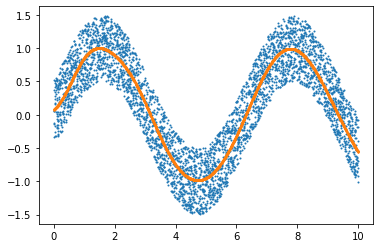

In [ ]:
train_sin_with_noise(1.0)

## 노이즈 크기 10.0

Model: "sequential_103"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_318 (Dense)            (None, 10)                20        
_________________________________________________________________
dense_319 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_320 (Dense)            (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 71.65288019180298
125/125 [==============================] - 0s 1ms/step - loss: 8.4343 - mae: 2.5173
loss= 8.434269905090332
mae= 2.517279624938965


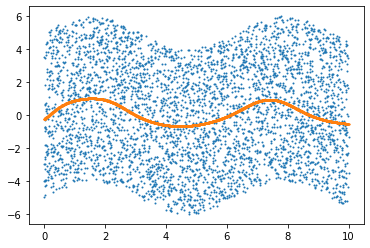

In [ ]:
train_sin_with_noise(10.0)

## 노이즈 피쳐
노이즈 입력을 하나 더 준다.

In [ ]:
x = np.arange(0,10,1.0)
np.random.shuffle(x)

y = np.zeros((x.shape[0],2))
y[:,0] = np.sin(x)
y[:,1] = np.random.rand(x.shape[0])


Model: "sequential_104"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_321 (Dense)            (None, 10)                30        
_________________________________________________________________
dense_322 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_323 (Dense)            (None, 1)                 11        
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
300/300 [==============================] - 1s 2ms/step - loss: 0.4078 - mae: 0.5599
Epoch 2/100
300/300 [==============================] - 1s 2ms/step - loss: 0.3618 - mae: 0.5301
Epoch 3/100
300/300 [==============================] - 0s 2ms/step - loss: 0.3305 - mae: 0.5078
Epoch 4/100
300/300 [==============================] - 1s 2ms/step - loss: 0.2980 - mae: 0.4798


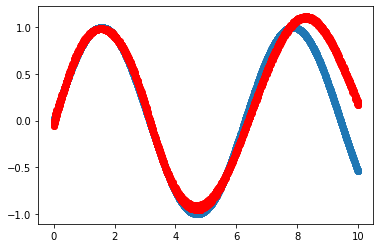

In [ ]:
# x = np.arange(0,10,0.001)
x = np.zeros((10000,2))
x[:,0] = np.arange(0,10,0.001) # ADD
x[:,1] = np.random.rand(x.shape[0]) # ADD
np.random.shuffle(x)

# y = np.sin(x)
y = np.sin(x[:,0])

split_index = int(x.shape[0]*0.6)

train_x, test_x = x[:split_index], x[split_index:]
train_y, test_y = y[:split_index], y[split_index:]

model = keras.Sequential()
model.add(Input(2))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mae"])
model.summary()


start_time = time.time()
# model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
model.fit(train_x, train_y, epochs=100, verbose=1, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))    


loss, mae = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mae=", mae)


y_ = model.predict(test_x)

plt.scatter(test_x[:,0],test_y)
plt.scatter(test_x[:,0],y_,color='r')
plt.show()

# 학습 되지 않는 랜덤 함수

랜덤 한수의 경우 x와 y의 간에 관계가 없다.

입출력 간에 관계가 없는 함수로 학습되지 않는다.

60


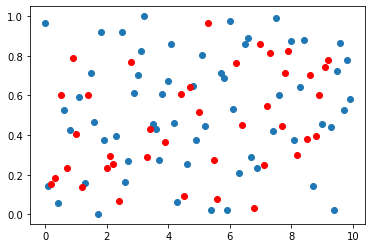

In [ ]:
x = np.arange(0,10,0.1)
np.random.shuffle(x)
# y = np.sin(x)
y = np.random.random_sample(x.shape[0])

split_index = int(x.shape[0]*0.6)
print(split_index)

train_x, test_x = x[:split_index], x[split_index:]
train_y, test_y = y[:split_index], y[split_index:]


plt.scatter(train_x, train_y)
plt.scatter(test_x, test_y, color="r")

Model: "sequential_105"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_324 (Dense)            (None, 10)                20        
_________________________________________________________________
dense_325 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_326 (Dense)            (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 6.002476215362549
2/2 [==============================] - 0s 6ms/step - loss: 0.0633 - mae: 0.2205
loss= 0.06330673396587372
mae= 0.22048814594745636


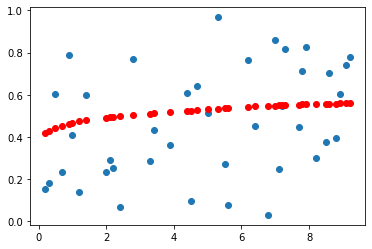

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Input

import time


# 모델 정의
model = keras.Sequential()
model.add(Input(1))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


# 모델 컴파일
model.compile(optimizer="SGD", loss="mse", metrics=["mae"])
model.summary()


# 학습
start_time = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))


# 평가
loss, mae = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mae=", mae)


# 예측
y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

# Optimizer

```
# SGD
model.compile(optimizer="SGD", ...)
model.compile(optimizer=SGD(learning_rate=0.01), ...)

# Adam
model.compile(optimizer="Adam", ...)
model.compile(optimizer=Adam(learning_rate=0.001), ...)

# Adagrad
model.compile(optimizer="Adagrad", ...)
model.compile(optimizer=Adagrad(learning_rate=0.001), ...)

# RMSProp
model.compile(optimizer="RMSprop", ...)
model.compile(optimizer=RMSprop(learning_rate=0.001), ...)
```

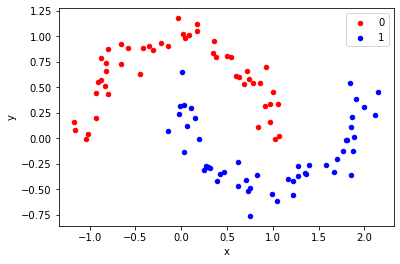

In [ ]:
from sklearn.datasets import make_moons
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from pandas import DataFrame
import matplotlib.pyplot as plt

x, y = make_moons(n_samples=100, noise=0.1, random_state=1)

df = DataFrame(dict(x=x[:,0], y=x[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()

split_index = int(len(x)*0.7)
train_x, test_x = x[:split_index], x[split_index:]
train_y, test_y = y[:split_index], y[split_index:]


## SGD

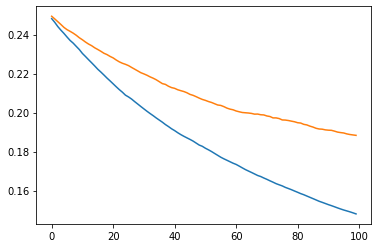

In [ ]:
optimizer = "SGD"


model = Sequential()
model.add(Input(2))
model.add(Dense(500, activation="relu"))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizer, loss="mse", metrics=["mae"])

model.fit(train_x, train_y, epochs=100, verbose=0, batch_size=20, validation_split=0.1)

plt.plot(model.history.history["loss"])
plt.plot(model.history.history["val_loss"])
plt.show() 

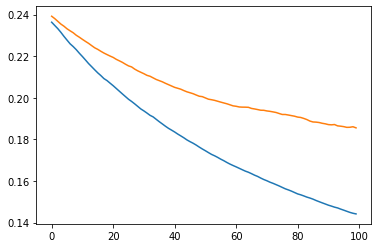

In [ ]:
from tensorflow.keras.optimizers import SGD

# optimizer = "SGD"
optimizer = SGD(learning_rate=0.01)


model = Sequential()
model.add(Input(2))
model.add(Dense(500, activation="relu"))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizer, loss="mse", metrics=["mae"])

model.fit(train_x, train_y, epochs=100, verbose=0, batch_size=20, validation_split=0.1)

plt.plot(model.history.history["loss"])
plt.plot(model.history.history["val_loss"])
plt.show() 

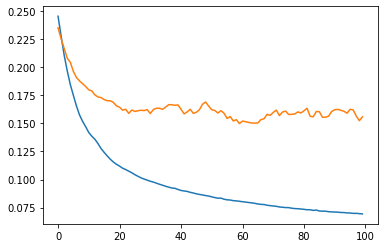

In [ ]:
from tensorflow.keras.optimizers import SGD

# optimizer = "SGD"
optimizer = SGD(learning_rate=0.01*10)


model = Sequential()
model.add(Input(2))
model.add(Dense(500, activation="relu"))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizer, loss="mse", metrics=["mae"])

model.fit(train_x, train_y, epochs=100, verbose=0, batch_size=20, validation_split=0.1)

plt.plot(model.history.history["loss"])
plt.plot(model.history.history["val_loss"])
plt.show() 

## Adam

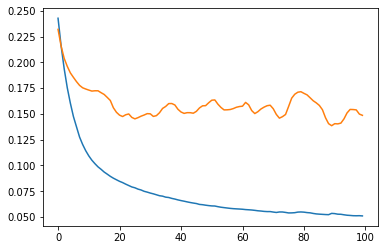

In [ ]:
optimizer = "Adam"


model = Sequential()
model.add(Input(2))
model.add(Dense(500, activation="relu"))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizer, loss="mse", metrics=["mae"])

model.fit(train_x, train_y, epochs=100, verbose=0, batch_size=20, validation_split=0.1)

plt.plot(model.history.history["loss"])
plt.plot(model.history.history["val_loss"])
plt.show() 

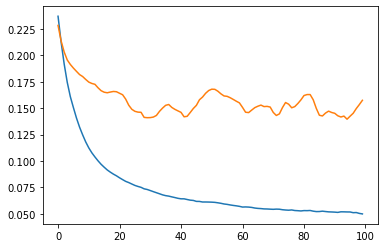

In [ ]:
from tensorflow.keras.optimizers import Adam

# optimizer = "Adam"
optimizer = Adam(learning_rate=0.001)



model = Sequential()
model.add(Input(2))
model.add(Dense(500, activation="relu"))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizer, loss="mse", metrics=["mae"])

model.fit(train_x, train_y, epochs=100, verbose=0, batch_size=20, validation_split=0.1)

plt.plot(model.history.history["loss"])
plt.plot(model.history.history["val_loss"])
plt.show() 

## Adagrad

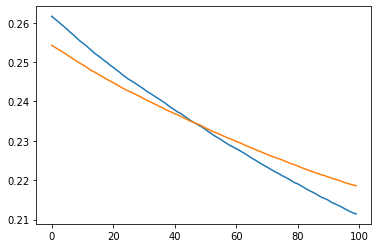

In [ ]:
optimizer = "Adagrad"



model = Sequential()
model.add(Input(2))
model.add(Dense(500, activation="relu"))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizer, loss="mse", metrics=["mae"])

model.fit(train_x, train_y, epochs=100, verbose=0, batch_size=20, validation_split=0.1)

plt.plot(model.history.history["loss"])
plt.plot(model.history.history["val_loss"])
plt.show() 

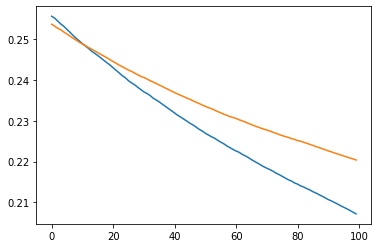

In [ ]:
from tensorflow.keras.optimizers import Adagrad

# optimizer = "Adagrad"
optimizer = Adagrad(learning_rate=0.001)



model = Sequential()
model.add(Input(2))
model.add(Dense(500, activation="relu"))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizer, loss="mse", metrics=["mae"])

model.fit(train_x, train_y, epochs=100, verbose=0, batch_size=20, validation_split=0.1)

plt.plot(model.history.history["loss"])
plt.plot(model.history.history["val_loss"])
plt.show() 

## RMSprop

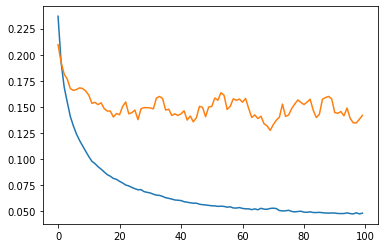

In [ ]:
optimizer = "RMSprop"



model = Sequential()
model.add(Input(2))
model.add(Dense(500, activation="relu"))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizer, loss="mse", metrics=["mae"])

model.fit(train_x, train_y, epochs=100, verbose=0, batch_size=20, validation_split=0.1)

plt.plot(model.history.history["loss"])
plt.plot(model.history.history["val_loss"])
plt.show() 

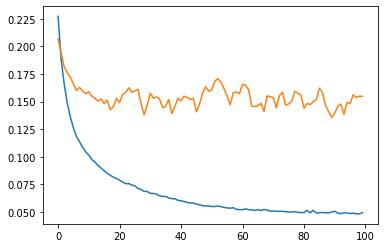

In [ ]:
from tensorflow.keras.optimizers import RMSprop

# optimizer = "RMSprop"
optimizer = RMSprop(learning_rate=0.001)



model = Sequential()
model.add(Input(2))
model.add(Dense(500, activation="relu"))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizer, loss="mse", metrics=["mae"])

model.fit(train_x, train_y, epochs=100, verbose=0, batch_size=20, validation_split=0.1)

plt.plot(model.history.history["loss"])
plt.plot(model.history.history["val_loss"])
plt.show() 

# 다양한 입출력

## 2개의 입력, 1개의 출력

x1 + x2 -> y의 함수를 학습

x1과 x2는 0~1의 범위를 갖는다.


Model: "sequential_115"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_345 (Dense)            (None, 10)                30        
_________________________________________________________________
dense_346 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_347 (Dense)            (None, 1)                 11        
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________
elapsed : 26.90859293937683
2/2 [==============================] - 0s 6ms/step - loss: 7.3111e-04 - mae: 0.0168
loss= 0.000731112202629447
mae= 0.01676790788769722


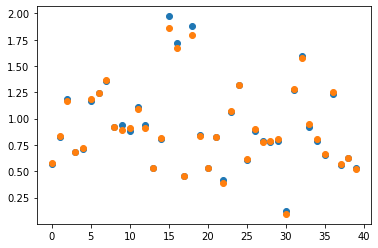

In [ ]:
x = np.ones((100,2))
x[:,0] = np.random.rand(100)
x[:,1] = np.random.rand(100)
y = np.sum(x, axis=1)


s = int(x.shape[0]*0.6)
train_x, test_x = x[:s], x[s:]
train_y, test_y = y[:s], y[s:]


model = keras.Sequential()
# model.add(Input(1))
model.add(Input(2))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))

model.compile(optimizer="SGD", loss="mse", metrics=["mae"])
model.summary()

start = time.time()
model.fit(train_x, train_y, epochs=1000*5, verbose=0, batch_size=20)
print("elapsed :", (time.time() - start))

loss, mae = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mae=", mae)
              
y_ = model.predict(test_x)

plt.plot(test_y, 'o')
plt.plot(y_, 'o')
plt.show()

## 1개의 입력, 2개의 출력

다음과 같이 y는 2개의 값을 갖고, y1 = x*2, y2=x/2인 함수를 학습

```
y1 = x*2.0
y2 = x/2.0
```


Model: "sequential_116"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_348 (Dense)            (None, 10)                20        
_________________________________________________________________
dense_349 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_350 (Dense)            (None, 2)                 22        
Total params: 152
Trainable params: 152
Non-trainable params: 0
_________________________________________________________________
elapsed : 10.483551502227783
2/2 [==============================] - 0s 8ms/step - loss: 8.3097e-04 - mae: 0.0206
loss= 0.000830973032861948
mae= 0.020600005984306335


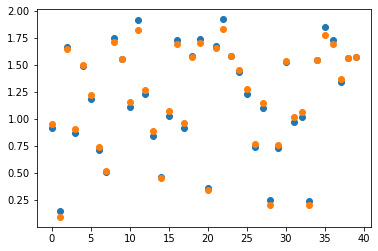

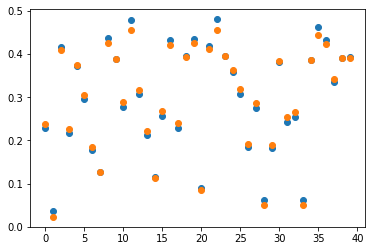

In [ ]:
x = np.random.rand(100)
y = np.zeros((100,2))
y[:,0] = x*2.0
y[:,1] = x/2.0


s = int(x.shape[0]*0.6)
train_x, test_x = x[:s], x[s:]
train_y, test_y = y[:s], y[s:]


from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense

model = keras.Sequential()
model.add(Input(1))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
# model.add(Dense(1))
model.add(Dense(2))

model.compile(optimizer="SGD", loss="mse", metrics=["mae"])
model.summary()

start = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed :", (time.time() - start))

loss, mae = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mae=", mae)
              
y_ = model.predict(test_x)

plt.plot(test_y[:,0], 'o')
plt.plot(y_[:,0], 'o')
plt.show()

plt.plot(test_y[:,1], 'o')
plt.plot(y_[:,1], 'o')
plt.show()


## 2개의 입력, 2개의 출력

x1 + x2 -> z, 

y1 = z*2, y2=z/2인 함수를 학습

x1과 x2는 0~1의 범위를 갖는다.

Model: "sequential_117"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_351 (Dense)            (None, 10)                30        
_________________________________________________________________
dense_352 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_353 (Dense)            (None, 2)                 22        
Total params: 162
Trainable params: 162
Non-trainable params: 0
_________________________________________________________________
elapsed : 10.473570585250854
2/2 [==============================] - 0s 7ms/step - loss: 0.0035 - mae: 0.0409
loss= 0.0034520942717790604
mae= 0.04093089699745178


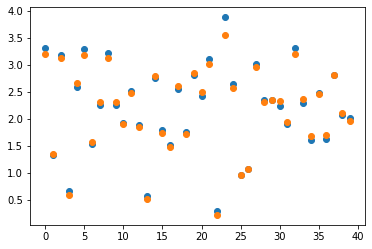

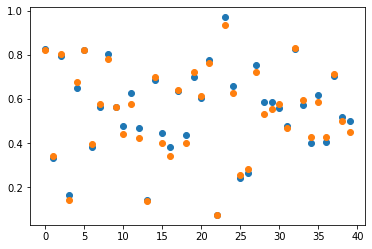

In [ ]:
x = np.ones((100,2))
x[:,0] = np.random.rand(100)
x[:,1] = np.random.rand(100)

z = np.sum(x, axis=1)

y = np.zeros((100,2))
y[:,0] = z*2.0
y[:,1] = z/2.0


s = int(x.shape[0]*0.6)
train_x, test_x = x[:s], x[s:]
train_y, test_y = y[:s], y[s:]


from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense

model = keras.Sequential()
# model.add(Input(1))
model.add(Input(2))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
# model.add(Dense(1))
model.add(Dense(2))

model.compile(optimizer="SGD", loss="mse", metrics=["mae"])
model.summary()

start = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed :", (time.time() - start))

loss, mae = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mae=", mae)
              
y_ = model.predict(test_x)

plt.plot(test_y[:,0], 'o')
plt.plot(y_[:,0], 'o')
plt.show()

plt.plot(test_y[:,1], 'o')
plt.plot(y_[:,1], 'o')
plt.show()

